# CNN-Plant Disease
### Name: Tanmay Walke
### Date: 31 March 2025
### Class: TY-CSE(AI)
### Roll No.: 65

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
pip install kagglehub

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("smaranjitghose/corn-or-maize-leaf-disease-dataset")

print("Path to dataset files:", path)

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 161M/161M [13:26<00:00, 209kB/s]  

Extracting files...


Path to dataset files: C:\Users\student\.cache\kagglehub\datasets\smaranjitghose\corn-or-maize-leaf-disease-dataset\versions\1


In [ ]:
#dataset = https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset/data

In [8]:
BATCHSIZE = 32
LG_IMGSIZE = (256,256)
SM_IMGSIZE = (32,32)

In [20]:
dataDir = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\student\\.cache\\kagglehub\\datasets\\smaranjitghose\\corn-or-maize-leaf-disease-dataset\\versions\\1\\data',
    batch_size = BATCHSIZE,
    image_size = LG_IMGSIZE,
)

Found 4188 files belonging to 4 classes.


In [21]:
classNames = dataDir.class_names
classNames

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

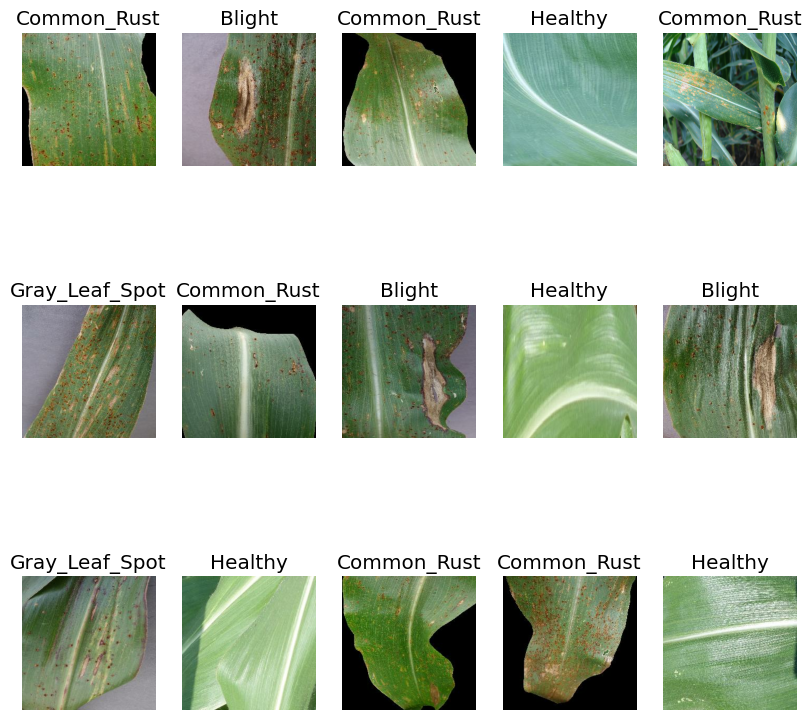

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in dataDir.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classNames[labels[i]], fontsize='x-large', fontweight='ultralight')
        plt.axis("off")

In [23]:
trainDS = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\student\\.cache\\kagglehub\\datasets\\smaranjitghose\\corn-or-maize-leaf-disease-dataset\\versions\\1\\data",
    batch_size = BATCHSIZE,
    image_size = SM_IMGSIZE,
    subset="training",
    seed=123,
    validation_split=0.2,
    shuffle=True
)

validDS = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\student\\.cache\\kagglehub\\datasets\\smaranjitghose\\corn-or-maize-leaf-disease-dataset\\versions\\1\\data",
    batch_size = BATCHSIZE,
    image_size = SM_IMGSIZE,
    subset="validation",
    seed=123,
    validation_split=0.2,
    shuffle=True
)

testDS = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\student\\.cache\\kagglehub\\datasets\\smaranjitghose\\corn-or-maize-leaf-disease-dataset\\versions\\1\\data",
    batch_size = BATCHSIZE,
    image_size = SM_IMGSIZE,
    seed=123,
    shuffle=True
    
)

Found 4188 files belonging to 4 classes.
Using 3351 files for training.
Found 4188 files belonging to 4 classes.
Using 837 files for validation.
Found 4188 files belonging to 4 classes.


In [24]:
model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,180 (477.27 KB)

 Trainable params: 122,180 (477.27 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(trainDS, epochs=30, validation_data=(validDS))

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5532 - loss: 1.0503 - val_accuracy: 0.7563 - val_loss: 0.5731
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7844 - loss: 0.5172 - val_accuracy: 0.7921 - val_loss: 0.4647
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8170 - loss: 0.4372 - val_accuracy: 0.8136 - val_loss: 0.4027
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8267 - loss: 0.4045 - val_accuracy: 0.8136 - val_loss: 0.3716
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8384 - loss: 0.3709 - val_accuracy: 0.8459 - val_loss: 0.3516
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8643 - loss: 0.3272 - val_accuracy: 0.8303 - val_loss: 0.3561
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8660 - loss: 0.3197 - val_accuracy: 0.8686 - val_loss: 0.3172
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8775 - loss: 0.2926 - val_accu

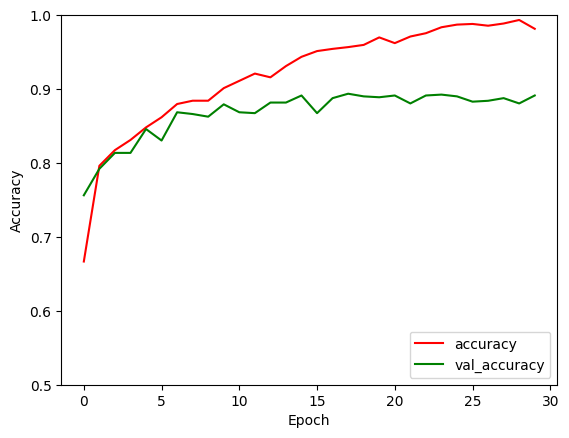

In [27]:
plt.plot(history.history['accuracy'], label='accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [28]:
test_loss, test_accuracy = model.evaluate(testDS, verbose=2)

131/131 - 1s - 8ms/step - accuracy: 0.9737 - loss: 0.1194


In [29]:
print(test_accuracy)

0.9737344980239868


In [30]:
yTrue = []
yPred = []

for images, labels in testDS:
    predictions = model.predict(images)
    predictClasses = np.argmax(predictions, axis=1)
    
    yTrue.extend(labels.numpy())
    yPred.extend(predictClasses)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

In [31]:
cr = classification_report(yTrue, yPred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1146
           1       0.99      0.99      0.99      1306
           2       0.94      0.90      0.92       574
           3       0.99      1.00      1.00      1162

    accuracy                           0.97      4188
   macro avg       0.97      0.96      0.97      4188
weighted avg       0.97      0.97      0.97      4188



[[1104    6   32    4]
 [   8 1293    3    2]
 [  50    5  519    0]
 [   0    0    0 1162]]


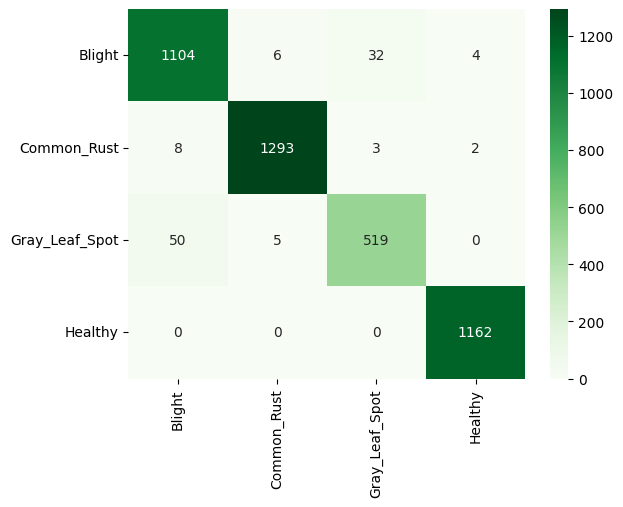

In [32]:
cf = confusion_matrix(yTrue, yPred)

sns.heatmap(cf, annot=True, fmt='g', cmap='Greens', xticklabels=classNames, yticklabels=classNames)
print(cf)

In [53]:
#Experimental Analysis

In [33]:
model1 = models.Sequential()
model1.add(layers.Rescaling(1./255, input_shape=(32,32,3)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(4))

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model1.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history1 = model1.fit(trainDS, epochs=30, validation_data=(validDS))

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5062 - loss: 1.0983 - val_accuracy: 0.7766 - val_loss: 0.5594
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7612 - loss: 0.6181 - val_accuracy: 0.6906 - val_loss: 0.7556
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7807 - loss: 0.5317 - val_accuracy: 0.7933 - val_loss: 0.4383
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8138 - loss: 0.4460 - val_accuracy: 0.7527 - val_loss: 0.6057
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8143 - loss: 0.4794 - val_accuracy: 0.7730 - val_loss: 0.5777
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8499 - loss: 0.3694 - val_accuracy: 0.8435 - val_loss: 0.3560
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8628 - loss: 0.3406 - val_accuracy: 0.8280 - val_loss: 0.4020
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8742 - loss: 0.3063 - val_accu

In [35]:
test_loss, test_accuracy = model1.evaluate(testDS, verbose=2)

131/131 - 1s - 10ms/step - accuracy: 0.9666 - loss: 0.1602


In [ ]:
#Experimental Analysis 2

In [36]:
model2 = models.Sequential()
model2.add(layers.Rescaling(1./255, input_shape=(32,32,3)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(4))

In [37]:
model2.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history2 = model2.fit(trainDS, epochs=30, validation_data=(validDS))

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4563 - loss: 1.1634 - val_accuracy: 0.7670 - val_loss: 0.5584
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7386 - loss: 0.6452 - val_accuracy: 0.7933 - val_loss: 0.4664
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7958 - loss: 0.5093 - val_accuracy: 0.8315 - val_loss: 0.4052
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8277 - loss: 0.4455 - val_accuracy: 0.6918 - val_loss: 0.9475
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8330 - loss: 0.4511 - val_accuracy: 0.8447 - val_loss: 0.3479
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8518 - loss: 0.3681 - val_accuracy: 0.8375 - val_loss: 0.3527
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8748 - loss: 0.3171 - val_accuracy: 0.8375 - val_loss: 0.4160
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8811 - loss: 0.3167 - val_accu

In [38]:
test_loss, test_accuracy = model2.evaluate(testDS, verbose=2)

131/131 - 1s - 8ms/step - accuracy: 0.9694 - loss: 0.1316
